In [86]:
#imports
import pandas as pd
import numpy as np
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import linear_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [87]:
rawData = pd.read_csv('cmc.csv')
print(rawData.shape)
rawData.head()

(1472, 10)


,24,2,3,3.1,1,1.1,2.1,3.2,0,1.2
0,45,1,3,10,1,1,3,4,0,1
1,43,2,3,7,1,1,3,4,0,1
2,42,3,2,9,1,1,3,3,0,1
3,36,3,3,8,1,1,3,2,0,1
4,19,4,4,0,1,1,3,3,0,1


In [88]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 10 columns):
24     1472 non-null int64
2      1472 non-null int64
3      1472 non-null int64
3.1    1472 non-null int64
1      1472 non-null int64
1.1    1472 non-null int64
2.1    1472 non-null int64
3.2    1472 non-null int64
0      1472 non-null int64
1.2    1472 non-null int64
dtypes: int64(10)
memory usage: 115.1 KB


In [89]:
###################################Recopilación de datos, preprocesamiento e ingeniería de características
rawData.columns=['wifeAge', 'wifeEducation','husbandEducation','numberChildren','wifeReligion','wifeWorking', 'husbandOccupation', 'standardLiving','mediaExposure', 'contraceptiveUsed']

In [90]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 10 columns):
wifeAge              1472 non-null int64
wifeEducation        1472 non-null int64
husbandEducation     1472 non-null int64
numberChildren       1472 non-null int64
wifeReligion         1472 non-null int64
wifeWorking          1472 non-null int64
husbandOccupation    1472 non-null int64
standardLiving       1472 non-null int64
mediaExposure        1472 non-null int64
contraceptiveUsed    1472 non-null int64
dtypes: int64(10)
memory usage: 115.1 KB


In [91]:
rawData.head()

,wifeAge,wifeEducation,husbandEducation,numberChildren,wifeReligion,wifeWorking,husbandOccupation,standardLiving,mediaExposure,contraceptiveUsed
0,45,1,3,10,1,1,3,4,0,1
1,43,2,3,7,1,1,3,4,0,1
2,42,3,2,9,1,1,3,3,0,1
3,36,3,3,8,1,1,3,2,0,1
4,19,4,4,0,1,1,3,3,0,1


In [92]:
###################################Exploratory Data Analysis

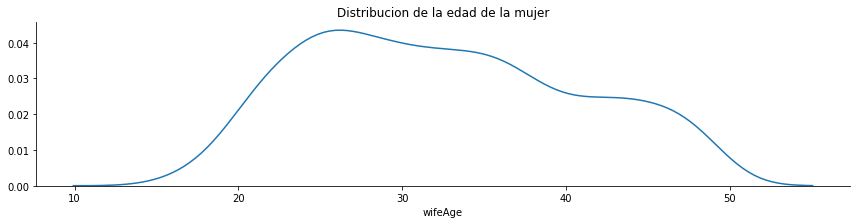

In [93]:
# Distribucion de la edad de la mujer

dist_wifeAge = sns.FacetGrid(rawData, aspect=4)
dist_wifeAge.map(sns.kdeplot, 'wifeAge')
dist_wifeAge.set(title='Distribucion de la edad de la mujer')


## se observa que la edad va desde 15 años hasta 50 años aproximadamente. Se concentran entre 25 y 35 años.  

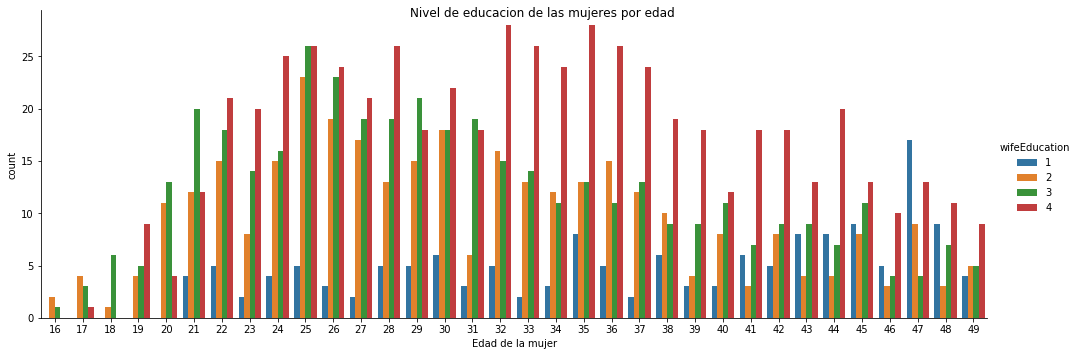

In [94]:
#Nivel de educacion de las mujeres por edad
edad_educacion = sns.catplot('wifeAge', data=rawData, hue='wifeEducation', kind='count', aspect=2.75)
edad_educacion.fig.suptitle('Nivel de educacion de las mujeres por edad')
edad_educacion.set_xlabels('Edad de la mujer')



## el grafico nos muestra que la cantidad de mujeres con nivel de educacion alto(4) se da en edades de 32 a 38 años.
## el nivel educativo bajo(1) no esta presenbte en el rango de edad de 16 a 20 años.
## el nivel educativo medio bajo (2) esta presente en todas las edades.
## el nivel educativo medio alto (3) tiene su mayor presencia en el rango de edad de 21 a 29 años.

Text(0.5, 0.98, 'Nivel de educacion de las mujeres')

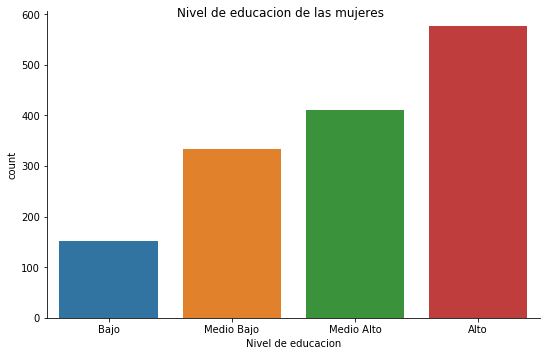

In [95]:
#Nivel de educacion de las mujeres
wifeEducation = sns.catplot('wifeEducation', data=rawData, kind='count', aspect=1.5)
wifeEducation.set_xlabels('Nivel de educacion')
wifeEducation.set_xticklabels(["Bajo", "Medio Bajo", "Medio Alto", "Alto"])
wifeEducation.fig.suptitle('Nivel de educacion de las mujeres')

##El nivel de educacion Alto con casi 600 mujeres, el nivel medio con alrededor 700 mujeres, el nivel de educacion
## bajo con alrdedor de 150 mujeres.

Text(0.5, 0.98, 'Nivel de educacion de las hombres')

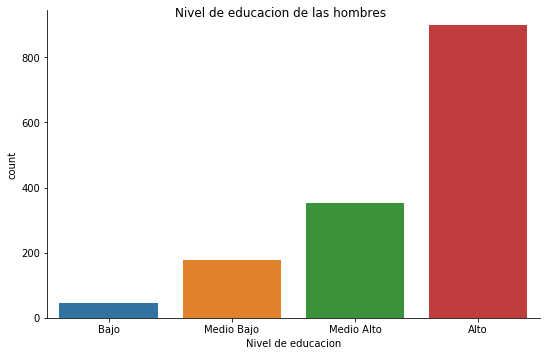

In [96]:
#Nivel de educacion de las hombres
husbandEducation = sns.catplot('husbandEducation', data=rawData, kind='count', aspect=1.5)
husbandEducation.set_xlabels('Nivel de educacion')
husbandEducation.set_xticklabels(["Bajo", "Medio Bajo", "Medio Alto", "Alto"])
husbandEducation.fig.suptitle('Nivel de educacion de las hombres')

##el nivel de educacion Alto superior a los 800 hombres, el nivel medio con alrededor 550 hombres, el nivel de educacion
## bajo con menos de 100.

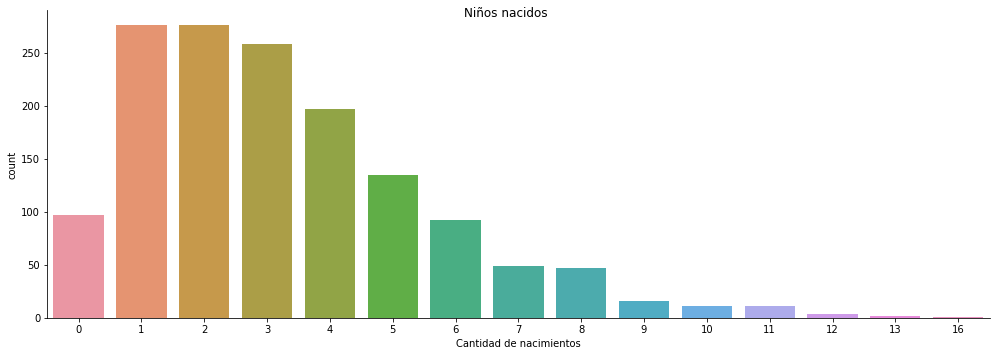

In [97]:
#Cantidad de niños nacidos
numberChildren = sns.catplot('numberChildren', data=rawData, kind='count', aspect=2.75)
numberChildren.fig.suptitle('Niños nacidos')
numberChildren.set_xlabels('Cantidad de nacimientos')


# alrededor de 100 mujeres no han tenido niños.
#La mayor cantidad de nacimientos esta en el rango de 1 a 4 nacimientos.

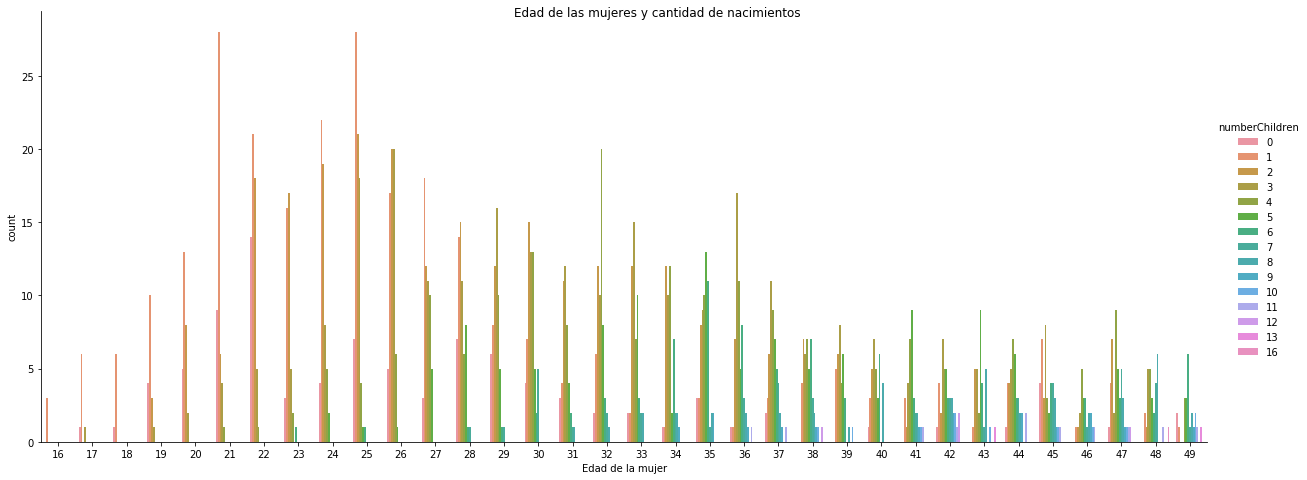

In [98]:
#Edad de las mujeres y cantidad de nacimientos
plot_edad_nacimientos = sns.catplot('wifeAge', data=rawData, hue='numberChildren', kind='count',  aspect=3.5)
plot_edad_nacimientos.set_xlabels('Edad de la mujer')
plot_edad_nacimientos.fig.suptitle('Edad de las mujeres y cantidad de nacimientos')
plot_edad_nacimientos.fig.set_figwidth(18)
plot_edad_nacimientos.fig.set_figheight(7)

#en el rango de edad de 16 a 27 años la mayoria de mujeres no presenta nacimientos.
#en el rango de edad de 21 a 25 años la cantidad de nacimiento es 1.
#en el rango de 22 a 26 años la cantidad de nacimientos es 2 a 3.
#en el rango de 32 y 35 años la cantidad de nacimientos es 5 a 7.
#en el rango de 36 y 38 años la cantidad de nacimientos es 8 a 10 en menor cantidad de mujeres.


Text(0.5, 0.98, 'Religión de la mujer')

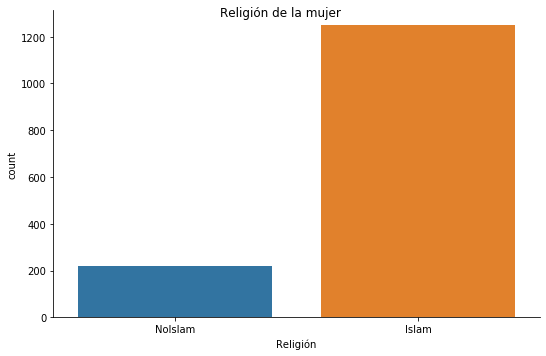

In [114]:
#Religión de las mujeres
wifeReligion = sns.catplot('wifeReligion', data=rawData, kind='count', aspect=1.5)
wifeReligion.set_xlabels('Religión')
wifeReligion.set_xticklabels(["NoIslam", "Islam"])
wifeReligion.fig.suptitle('Religión de la mujer')

##mas de 1200 mujeres profesan la religión Islam.  Un poco mas de 200 no profesan el Islam como religión.


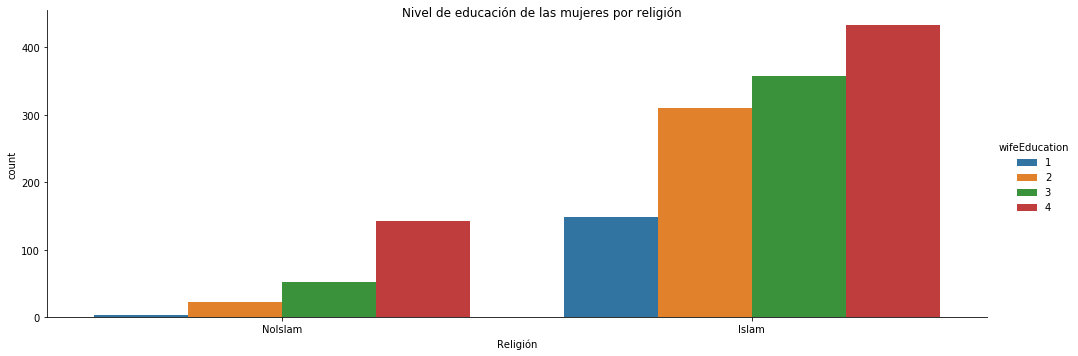

In [115]:
#Nivel de educación de las mujeres por religión
religion_educacion = sns.catplot('wifeReligion', data=rawData, hue='wifeEducation', kind='count', aspect=2.75)
religion_educacion.fig.suptitle('Nivel de educación de las mujeres por religión')
religion_educacion.set_xticklabels(["NoIslam", "Islam"])
religion_educacion.set_xlabels('Religión')

## Mayoritariamente las mujeres con un nivel educativo alto(4) practican el Islam, ademas esto se mantiene
## para el resto de los niveles educativos y si profesan el Islam o no.
## Para las mujeres que no profesan el Islam casi ninguna de ellas tiene nivel educativo bajo.


Text(0.5, 0.98, 'Mujeres que trabajan')

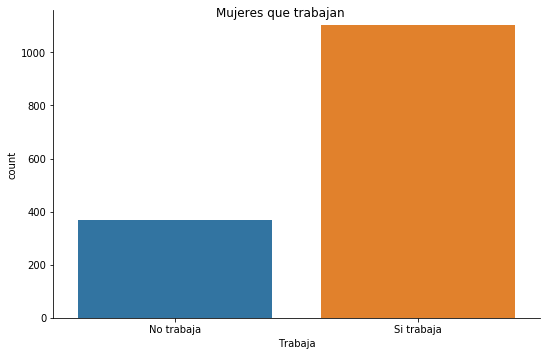

In [116]:
#Mujeres que trabajan
wifeWorking = sns.catplot('wifeWorking', data=rawData, kind='count', aspect=1.5)
wifeWorking.set_xlabels('Trabaja')
wifeWorking.set_xticklabels(["No trabaja", "Si trabaja"])
wifeWorking.fig.suptitle('Mujeres que trabajan')

## Mas de 1000 mujeres si trabaja fuera del hogar siendo estas la mayoria.

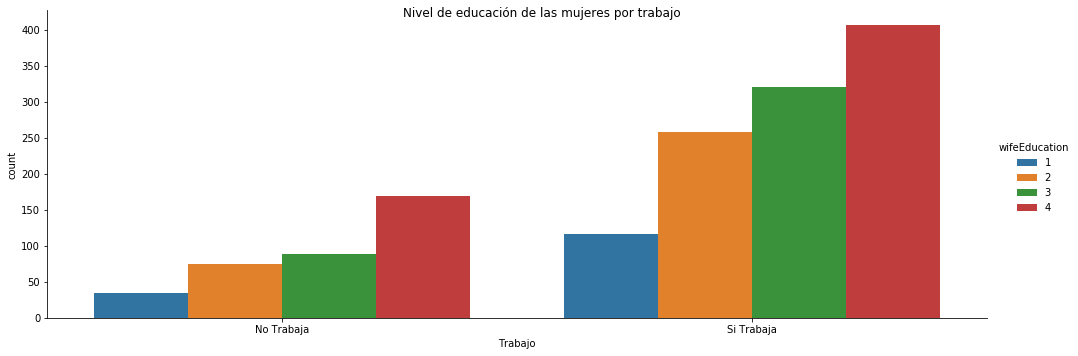

In [117]:
#Nivel de educacion de las mujeres y trabajo
trabajo_educacion = sns.catplot('wifeWorking', data=rawData, hue='wifeEducation', kind='count', aspect=2.75)
trabajo_educacion.fig.suptitle('Nivel de educación de las mujeres por trabajo')
trabajo_educacion.set_xticklabels(["No Trabaja", "Si Trabaja"])
trabajo_educacion.set_xlabels('Trabajo')

##Las mujeres que si trabajan son la mayoria, de estas la mayoria tiene un nivel educativo alto, el nivel medio
##educativo lo componen alrededor de 600 mujeres.

## Menos de 200 mujeres con nivel educativo alto no trabajan,  ademas los niveles de bajo a medio de mujeres que no
##trabajan suman alrededor de 250.

Text(0.5, 0.98, 'Ocupación de los hombres')

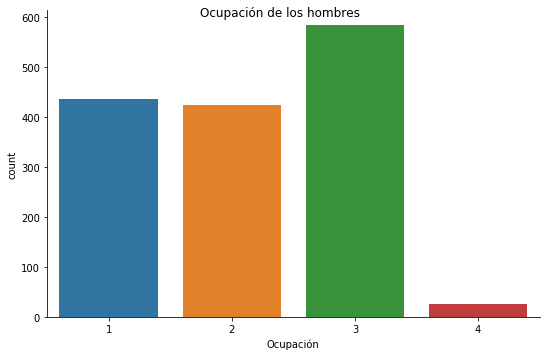

In [118]:
#Ocupacion de los hombres
husbandOccupation = sns.catplot('husbandOccupation', data=rawData, kind='count', aspect=1.5)
husbandOccupation.set_xlabels('Ocupación')
husbandOccupation.set_xticklabels(["1", "2", "3", "4"])
husbandOccupation.fig.suptitle('Ocupación de los hombres')

##La ocupación 3 representa casi 600 y la mayor.  las ocupaciones 1 y2 ambas superan a la ocupación 3 sumando casi 800.


Text(0.5, 0.98, 'Estandar de vida')

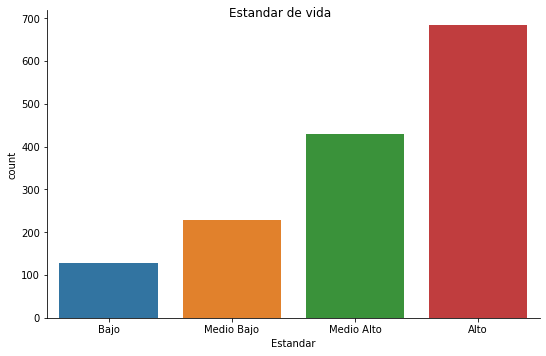

In [119]:
#Estandar de vida
standardLiving = sns.catplot('standardLiving', data=rawData, kind='count', aspect=1.5)
standardLiving.set_xlabels('Estandar')
standardLiving.set_xticklabels(["Bajo", "Medio Bajo", "Medio Alto", "Alto"])
standardLiving.fig.suptitle('Estandar de vida')

##El estandar de vida alto alcanza casi los 700, el medio ronda los 400 y los niveles medio bajo y bajo rondan los 300.

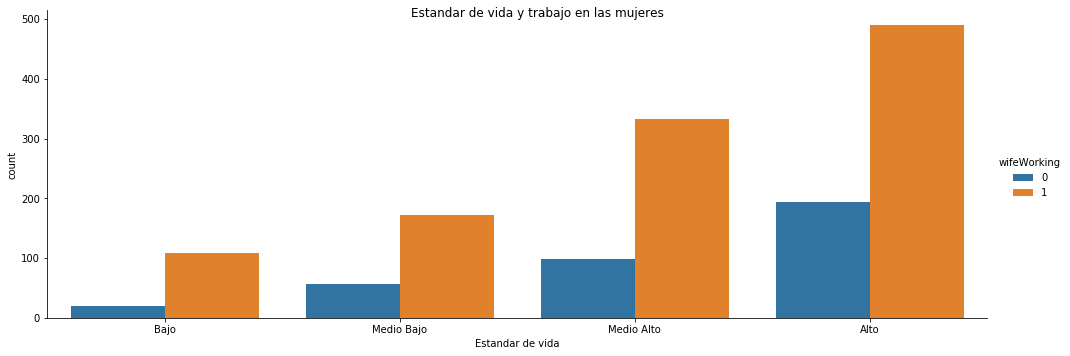

In [120]:
#Estandar de vida y tabajo en las mujeres
trabajo_estandarVida = sns.catplot('standardLiving', data=rawData, hue='wifeWorking', kind='count', aspect=2.75)
trabajo_estandarVida.fig.suptitle('Estandar de vida y trabajo en las mujeres')
trabajo_estandarVida.set_xticklabels(["Bajo", "Medio Bajo", "Medio Alto", "Alto"])
trabajo_estandarVida.set_xlabels('Estandar de vida')

##Las mujeres que trabajan tienen un mayor estandar de vida alto,  las mujeres que no trabajan reflejan un estandar
## de vida bajo  en relación con las que si trabajan.

Text(0.5, 0.98, 'Exposición a medios')

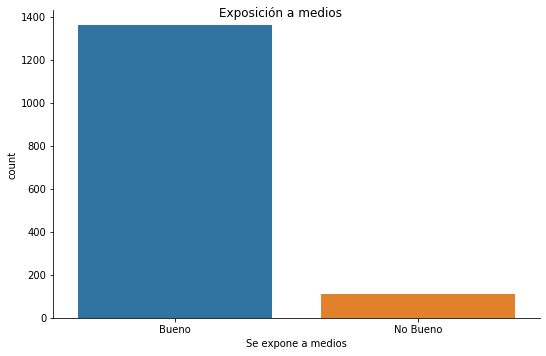

In [121]:
#Exposicion a medios

mediaExposure = sns.catplot('mediaExposure', data=rawData, kind='count', aspect=1.5)
mediaExposure.set_xlabels('Se expone a medios')
mediaExposure.set_xticklabels(["Bueno", "No Bueno"])
mediaExposure.fig.suptitle('Exposición a medios')

##La mayoria de mujeres esta expuesta a influencia de los medios de comunicación masiva.


Text(0.5, 0.98, 'Método anticonceptivo usado')

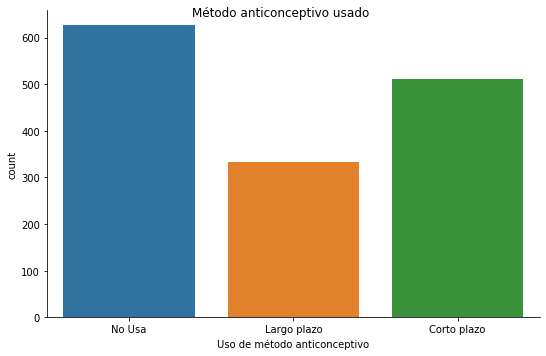

In [122]:
#Metodo anticonceptivo usado 1=No-use 2=Long-term 3=Short-term

contraceptiveUsed = sns.catplot('contraceptiveUsed', data=rawData, kind='count', aspect=1.5)
contraceptiveUsed.set_xlabels('Uso de método anticonceptivo')
contraceptiveUsed.set_xticklabels(["No Usa", "Largo plazo", "Corto plazo"])
contraceptiveUsed.fig.suptitle('Método anticonceptivo usado')

##La mayoría de mujeres no usan método anticonceptivo. Seguido por las mujeres que utilizan método anticonceptivo
##de corto plazo.   De ultimo las mujeres que utilizan método anticonceptivo de largo plazo.

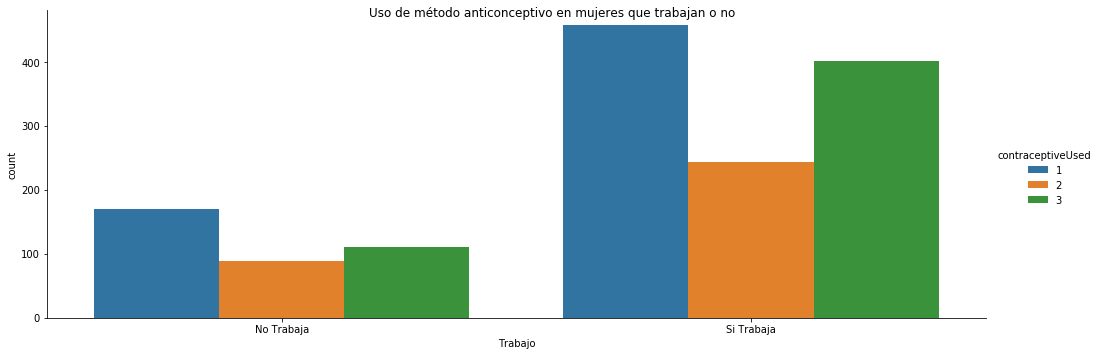

In [123]:
#Uso de metodo anticonceptivo en mujeres que trabajan o no
trabajo_contraceptiveUsed = sns.catplot('wifeWorking', data=rawData, hue='contraceptiveUsed', kind='count', aspect=2.75)
trabajo_contraceptiveUsed.fig.suptitle('Uso de método anticonceptivo en mujeres que trabajan o no')
trabajo_contraceptiveUsed.set_xticklabels(["No Trabaja", "Si Trabaja"])
trabajo_contraceptiveUsed.set_xlabels('Trabajo')

##La mayoría de las mujeres que si trabajan fuera del hogar no utilizan ningun metodo anticonceptivo.
## sin embargo el uso de anticonceptivo (largo y corto plazo) en las mujeres que si trabajan fuera del hogar
##es mayor que el de las mujeres que no trabajan fuera del hogar.
## el uso de método anticonceptivo de largo y corto plazo en las mujeres que no tabajan fuera del hogar

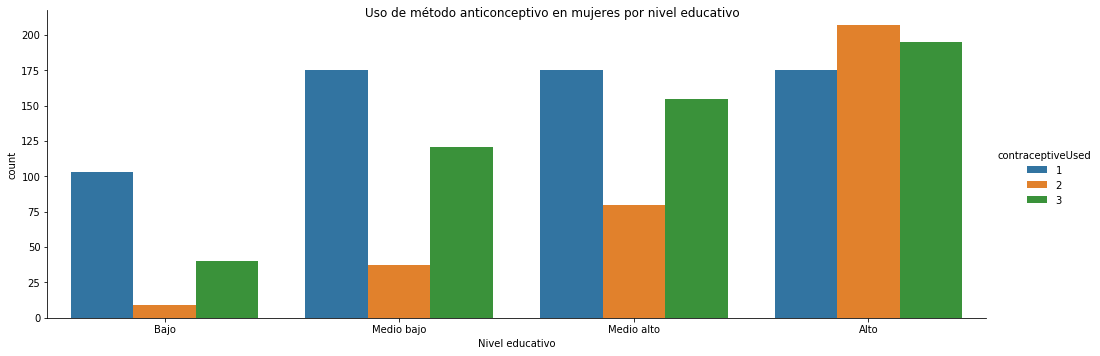

In [124]:
#Uso de metodo anticonceptivo en mujeres por nivel educativo
nivelEducativo_contraceptiveUsed = sns.catplot('wifeEducation', data=rawData, hue='contraceptiveUsed', kind='count', aspect=2.75)
nivelEducativo_contraceptiveUsed.fig.suptitle('Uso de método anticonceptivo en mujeres por nivel educativo')
nivelEducativo_contraceptiveUsed.set_xticklabels(["Bajo", "Medio bajo", "Medio alto", "Alto"])
nivelEducativo_contraceptiveUsed.set_xlabels('Nivel educativo')

##Se observa que las mujeres de nivel educativo alto utilizan métodos anticonceptivos de corto y largo plazo mayormente.
##pero también se observa que gran cantidad de ellas no utilizan ningún método anticonceptivo.
## En los niveles educativos bajo/medio bajo y medio alto la mayoría de las mujeres no utilizan ningún 
## método anticonceptivo.  Además en esos niveles educativos, las mujeres que utilizan algún método anticonceptivo
## utilizan métodos de corto plazo.


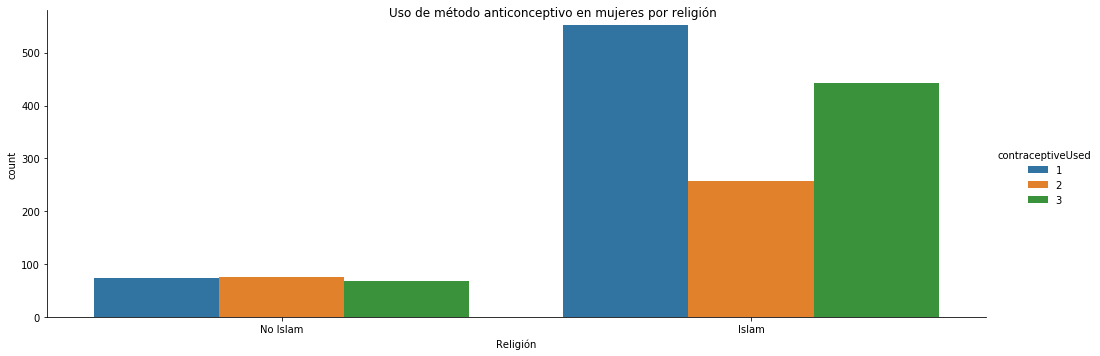

In [125]:
#Uso de metodo anticonceptivo en mujeres por religion
wifeReligion_contraceptiveUsed = sns.catplot('wifeReligion', data=rawData, hue='contraceptiveUsed', kind='count', aspect=2.75)
wifeReligion_contraceptiveUsed.fig.suptitle('Uso de método anticonceptivo en mujeres por religión')
wifeReligion_contraceptiveUsed.set_xticklabels(["No Islam", "Islam"])
wifeReligion_contraceptiveUsed.set_xlabels('Religión')

##La mayoría de las mujeres que profesan el Islam no utilizan ningún medio anticonceptivo.  Y si lo utilizan prefieren
##anticonceptivo de corto plazo.
##Las mujeres que no profesan el Islam, casi en forma igual, no utilizan o utilizan anticonceptivos de largo y corto plazo


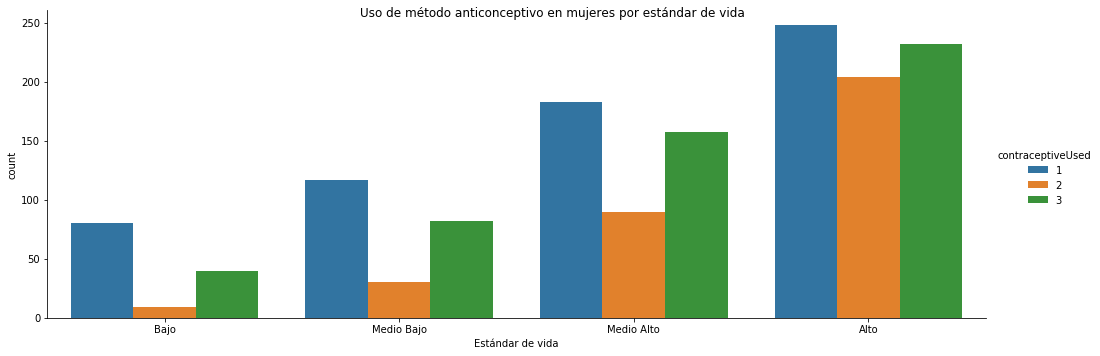

In [126]:
#Uso de metodo anticonceptivo en mujeres por estandar de vida
standardLiving_contraceptiveUsed = sns.catplot('standardLiving', data=rawData, hue='contraceptiveUsed', kind='count', aspect=2.75)
standardLiving_contraceptiveUsed.fig.suptitle('Uso de método anticonceptivo en mujeres por estándar de vida')
standardLiving_contraceptiveUsed.set_xticklabels(["Bajo", "Medio Bajo", "Medio Alto", "Alto"])
standardLiving_contraceptiveUsed.set_xlabels('Estándar de vida')

##Las mujeres con estándar de vida en los cuatro niveles, mayoritariamente no utilizan ningún método anticonceptivo.
## Además si utilizan algún método anticonceptivo prefieren utilizar el de corto plazo.


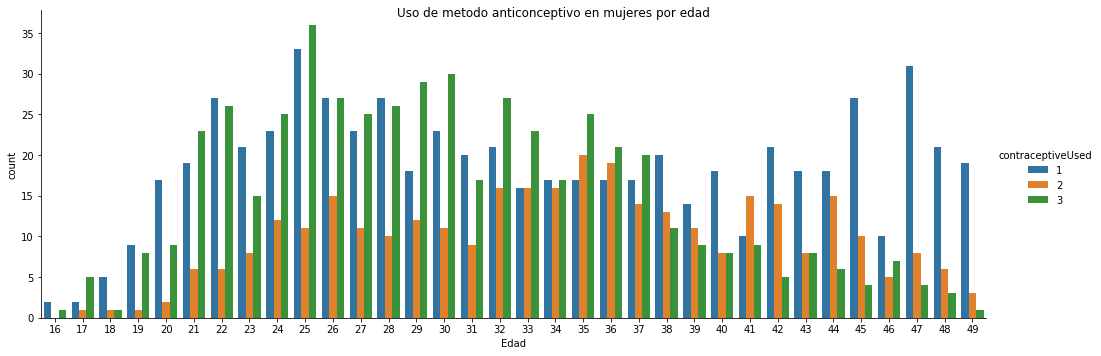

In [127]:
#Uso de metodo anticonceptivo en mujeres por edad
wifeAge_contraceptiveUsed = sns.catplot('wifeAge', data=rawData, hue='contraceptiveUsed', kind='count', aspect=2.75)
wifeAge_contraceptiveUsed.fig.suptitle('Uso de metodo anticonceptivo en mujeres por edad')
wifeAge_contraceptiveUsed.set_xlabels('Edad')

## las mujeres desde los 38 a los 49 años no utilizan ningún método anticonceptivo.
## Las mujeres en el rango de 24 a 27 y de 29 y 30 años prefieren el uso de anticonceptivo de corto plazo
## Las mujeres con edad de 17 años prefieren el uso de anticonceptivo de corto plazo
##Las mujeres con edades de 21, 24,25, 35, 36 y 37 prefieren anticonceptivo de largo plazo


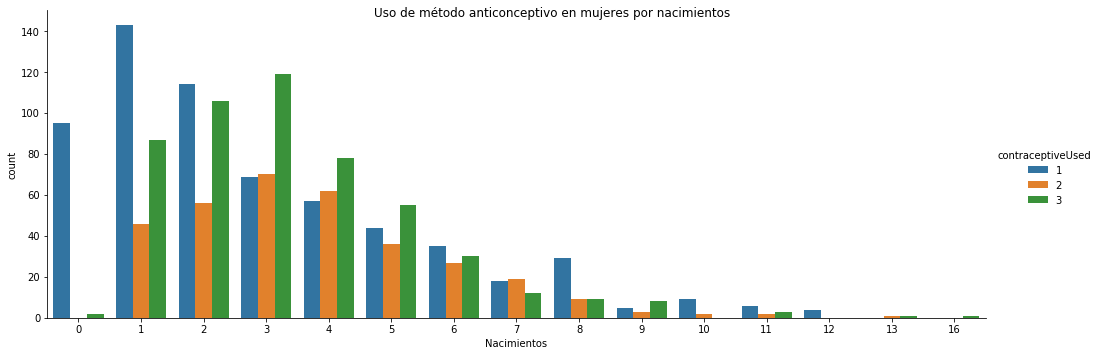

In [128]:
#Uso de metodo anticonceptivo en mujeres por nacimientos
numberChildren_contraceptiveUsed = sns.catplot('numberChildren', data=rawData, hue='contraceptiveUsed', kind='count', aspect=2.75)
numberChildren_contraceptiveUsed.fig.suptitle('Uso de método anticonceptivo en mujeres por nacimientos')
numberChildren_contraceptiveUsed.set_xlabels('Nacimientos')

## de 0 a 2 nacimientos y de 6  prefieren no utilizar ningun método anticonceptivo
## de 3 a 5 nacimientos prefieren utilizar método anticonceptivo de corto plazo.
## nacimientos mayores e iguales a 8, prefieren no utilizar ningun metodo anticonceptivo
## el  método anticonceptivo de largo plazo es menos utilizado

In [129]:
###################################Recopilación de datos, preprocesamiento e ingeniería de características

In [130]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 10 columns):
wifeAge              1472 non-null int64
wifeEducation        1472 non-null int64
husbandEducation     1472 non-null int64
numberChildren       1472 non-null int64
wifeReligion         1472 non-null int64
wifeWorking          1472 non-null int64
husbandOccupation    1472 non-null int64
standardLiving       1472 non-null int64
mediaExposure        1472 non-null int64
contraceptiveUsed    1472 non-null int64
dtypes: int64(10)
memory usage: 115.1 KB


In [131]:
#Categorizando las variables

# Se crean compartimentos para la EDAD de la esposa, usando la funcion cut de pandas,
#se definen los compartimentos deseados unidades de 10.
rawData['wifeAge'] = pd.cut(rawData['wifeAge'], bins=[10, 20, 30, 40, 50, 60, 70, 80, 90]).cat.codes
rawData['wifeEducation'] = rawData['wifeEducation'].astype('category')
rawData['husbandEducation'] = rawData['husbandEducation'].astype('category')
rawData['husbandOccupation'] = rawData['husbandOccupation'].astype('category')
rawData['standardLiving'] = rawData['standardLiving'].astype('category')
rawData['contraceptiveUsed'] = rawData['contraceptiveUsed'].astype('category')



In [132]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 10 columns):
wifeAge              1472 non-null int8
wifeEducation        1472 non-null category
husbandEducation     1472 non-null category
numberChildren       1472 non-null int64
wifeReligion         1472 non-null int64
wifeWorking          1472 non-null int64
husbandOccupation    1472 non-null category
standardLiving       1472 non-null category
mediaExposure        1472 non-null int64
contraceptiveUsed    1472 non-null category
dtypes: category(5), int64(4), int8(1)
memory usage: 55.6 KB


In [133]:
rawData.head()

,wifeAge,wifeEducation,husbandEducation,numberChildren,wifeReligion,wifeWorking,husbandOccupation,standardLiving,mediaExposure,contraceptiveUsed
0,3,1,3,10,1,1,3,4,0,1
1,3,2,3,7,1,1,3,4,0,1
2,3,3,2,9,1,1,3,3,0,1
3,2,3,3,8,1,1,3,2,0,1
4,0,4,4,0,1,1,3,3,0,1


In [134]:
#Variable Dependiente
dependiente = rawData['contraceptiveUsed']

In [135]:
#Entrenamiento
X_train = rawData.iloc[:,0:9]
X_train.shape


(1472, 9)

In [136]:
#Dependent Variable Training Set (y Training)
y_train = dependiente
y_train.shape

(1472,)

In [137]:
X_train, X_test, y_train, y_test = split(X_train,y_train)

In [138]:
#dimensionamiento del arreglo para entrenamiento y prueba
X_train.shape,X_test.shape


((1104, 9), (368, 9))

In [139]:
###################################Modelización predictiva y evaluación

In [140]:
#K-nearest neighbors (KNN)
#BallTree: para problemas rápidos generalizados de punto N
#Leaf_size: Número de puntos en los que cambiar a fuerza bruta.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



mdl_knn = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree', leaf_size=40)
mdl_knn = mdl_knn.fit(X_train, y_train)
pred_knn = mdl_knn.predict(X_test)

print ("KNN exactitud: ",accuracy_score(y_test, pred_knn))

KNN exactitud:  0.5108695652173914


In [141]:
###################################Cross Validation
print(cross_val_score(mdl_knn, X_train, y_train)) 

[0.49322493 0.49728261 0.47138965]


/Users/luisporras/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [142]:
#Naïve Bayes es uno de los clasificadores más utilizados por su simplicidad y rapidez. 
#Se trata de una técnica de clasificación
#y predicción supervisada que construye modelos que predicen la probabilidad de posibles resultados

from sklearn.naive_bayes import GaussianNB

mdl_gnb = GaussianNB()
mdl_gnb.fit(X_train, y_train)
pred_gnb = mdl_gnb.predict(X_test)
print ("NaiveBayes exactitud: ",accuracy_score(y_test, pred_gnb))



NaiveBayes exactitud:  0.5407608695652174


In [143]:
###################################Cross Validation
print(cross_val_score(mdl_gnb, X_train, y_train)) 

[0.47696477 0.41304348 0.47683924]


/Users/luisporras/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [144]:
##Support vector machine (SVM)

mdl_svc=LinearSVC(max_iter=6500)
mdl_svc.fit(X_train,y_train)
pred_svc = mdl_svc.predict(X_test)
print ("Support vector machine exactitud: ",accuracy_score(y_test, pred_svc))


Support vector machine exactitud:  0.49728260869565216


/Users/luisporras/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [145]:
###################################Cross Validation
print(cross_val_score(mdl_svc, X_train, y_train)) 

/Users/luisporras/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/luisporras/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/luisporras/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0.50135501 0.5        0.52588556]


In [146]:

#Algoritmo a utilizar en el problema de optimización.Para problemas multiclase, 
#solo 'newton-cg', 'sag', 'saga' y 'lbfgs' manejan la pérdida multinomial

mdl_lrm=LogisticRegression(multi_class="multinomial",solver ="lbfgs")
mdl_lrm=mdl_lrm.fit(X_train,y_train)
pred_lrm = mdl_lrm.predict(X_test)
print ("Logistic Regression exactitud: ",accuracy_score(y_test, pred_lrm))



Logistic Regression exactitud:  0.5135869565217391


/Users/luisporras/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [147]:
###################################Cross Validation
print(cross_val_score(mdl_lrm, X_train, y_train))

[0.49864499 0.49456522 0.52588556]


/Users/luisporras/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/luisporras/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/luisporras/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/luisporras/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [148]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators: numero de arboles en el bosque
# max_depth:La profundidad máxima del árbol. 
# 
mdl_RF = RandomForestClassifier(n_estimators=500, max_depth=5)

mdl_RF.fit(X_train, y_train)
pred_RF = mdl_RF.predict(X_test)
print ("RF exactitud: ",accuracy_score(y_test, pred_RF))

RF exactitud:  0.5353260869565217


In [149]:
###################################Cross Validation
print(cross_val_score(mdl_RF, X_train, y_train))

/Users/luisporras/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.55826558 0.53532609 0.58038147]


In [150]:
###################################Modelo de clasificacion seleccionado

In [151]:
#RandomForest con n_estimators=500, max_depth=5 tiene el mejor desempeño con una exactitud de 0.55

In [168]:
#RandomForest mas informacion posterior a la seleccion del modelo
#Probablidades de las clase predichas

mdl_RF.predict_proba(X_test)


array([[0.314007  , 0.30705257, 0.37894043],
       [0.64501161, 0.19416379, 0.16082459],
       [0.31048131, 0.26341827, 0.42610042],
       ...,
       [0.3684887 , 0.1660805 , 0.4654308 ],
       [0.52933126, 0.14422739, 0.32644135],
       [0.5174557 , 0.12714188, 0.35540242]])

In [153]:
#n_classes_:El número de clases (problema de salida única) o 
#una lista que contiene el número de clases para cada salida (problema de salida múltiple).
print(mdl_RF.n_classes_)

3


In [154]:
#RandomForest mas informacion posterior a la seleccion del modelo
#Devuelve la precisión media en los datos de prueba y las etiquetas dadas.
mdl_RF.score(X_train,y_train)

0.582427536231884

In [155]:
mdl_RF.decision_path(X_train)

(<1104x22414 sparse matrix of type '<class 'numpy.int64'>'
 	with 3241525 stored elements in Compressed Sparse Row format>,
 array([    0,    43,   102,   135,   174,   235,   292,   347,   394,
          455,   502,   547,   586,   627,   666,   701,   738,   771,
          822,   877,   930,   985,  1044,  1077,  1112,  1165,  1216,
         1271,  1310,  1339,  1390,  1431,  1486,  1537,  1582,  1619,
         1660,  1703,  1736,  1775,  1832,  1873,  1910,  1959,  2016,
         2055,  2086,  2141,  2200,  2255,  2298,  2335,  2380,  2433,
         2488,  2533,  2572,  2631,  2686,  2731,  2768,  2805,  2840,
         2875,  2916,  2971,  3016,  3067,  3108,  3161,  3208,  3243,
         3292,  3333,  3368,  3425,  3482,  3531,  3564,  3597,  3652,
         3687,  3742,  3787,  3840,  3891,  3948,  3983,  4040,  4087,
         4120,  4165,  4212,  4243,  4282,  4315,  4368,  4419,  4458,
         4497,  4536,  4589,  4634,  4687,  4724,  4759,  4806,  4839,
         4888,  4921,  4

In [156]:
#Reporte de resultados de clasificacion
target_names = ['No-use' , 'Long-term','Short-term']
print(classification_report(y_test, pred_RF, target_names=target_names))

              precision    recall  f1-score   support

      No-use       0.65      0.65      0.65       150
   Long-term       0.68      0.20      0.31        96
  Short-term       0.43      0.66      0.52       122

    accuracy                           0.54       368
   macro avg       0.58      0.50      0.49       368
weighted avg       0.58      0.54      0.52       368



In [157]:
# Matriz de confusion
from sklearn.metrics import multilabel_confusion_matrix
print(multilabel_confusion_matrix(y_test, pred_RF))


[[[165  53]
  [ 53  97]]

 [[263   9]
  [ 77  19]]

 [[137 109]
  [ 41  81]]]


In [159]:
###################################Factores de importancia usando Random Forest

In [160]:
print(mdl_RF.feature_importances_)

[0.19483188 0.14691757 0.06300567 0.38992288 0.02007092 0.02665149
 0.0558882  0.07085507 0.03185633]


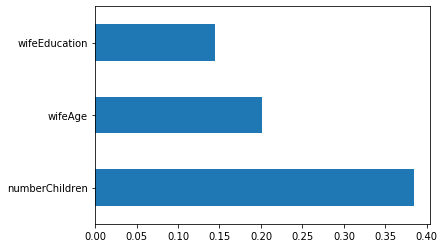

In [178]:
# Factores de importancia
(pd.Series(mdl_RF.feature_importances_, index=X_train.columns)
   .nlargest(3)
   .plot(kind='barh'))
plt.savefig('feature_importances')

# se muestra que el modelo ha determinado que la edad, el nivel educativo y 
# cantidad de niños nacidos son factoresde importancia.

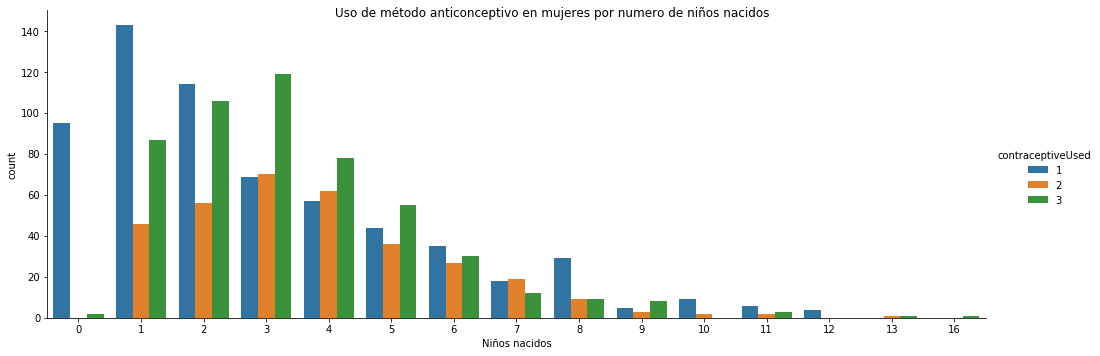

In [175]:
#Uso de método anticonceptivo en mujeres por numero de niños nacidos
numberChildren_contraceptiveUsed = sns.catplot('numberChildren', data=rawData, hue='contraceptiveUsed', kind='count', aspect=2.75)
numberChildren_contraceptiveUsed.fig.suptitle('Uso de método anticonceptivo en mujeres por numero de niños nacidos')
numberChildren_contraceptiveUsed.set_xlabels('Niños nacidos')
plt.savefig('numberChildren_contraceptiveUsed')

##Los nacimientos de 1, 2, 6 y 8 niños en su mayoria se da con el uso de ningun método anticonceptivo.
##Los nacimientos de 3,4 y 5 niños en su mayoria se da con el uso del  método anticonceptivo de corto plazo.

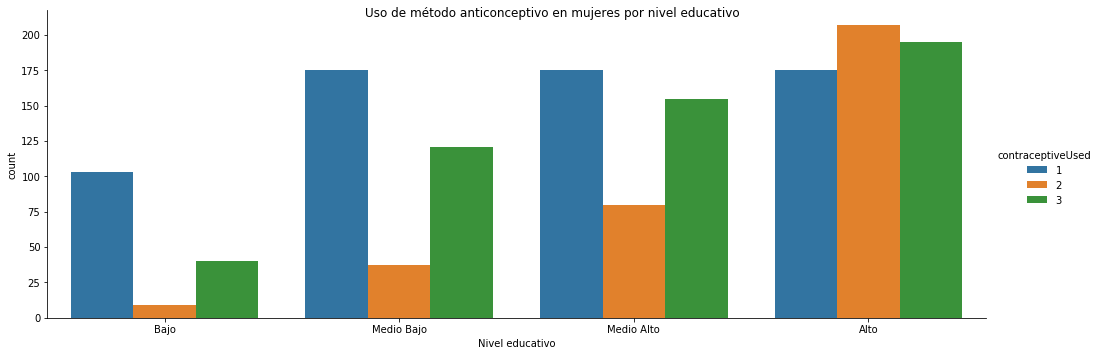

In [176]:
#Uso de metodo anticonceptivo en mujeres por nnivel educativo
wifeEducation_contraceptiveUsed = sns.catplot('wifeEducation', data=rawData, hue='contraceptiveUsed', kind='count', aspect=2.75)
wifeEducation_contraceptiveUsed.fig.suptitle('Uso de método anticonceptivo en mujeres por nivel educativo')
wifeEducation_contraceptiveUsed.set_xlabels('Nivel educativo')
wifeEducation_contraceptiveUsed.set_xticklabels(["Bajo", "Medio Bajo", "Medio Alto", "Alto"])
plt.savefig('wifeEducation_contraceptiveUsed')
##En el nivel educativo alto las mujeres utilizan mayoritariamente el método anticonceptivo de largo plazo
##En los 3 niveles educativos restantes no utilizan método anticonceptivo.


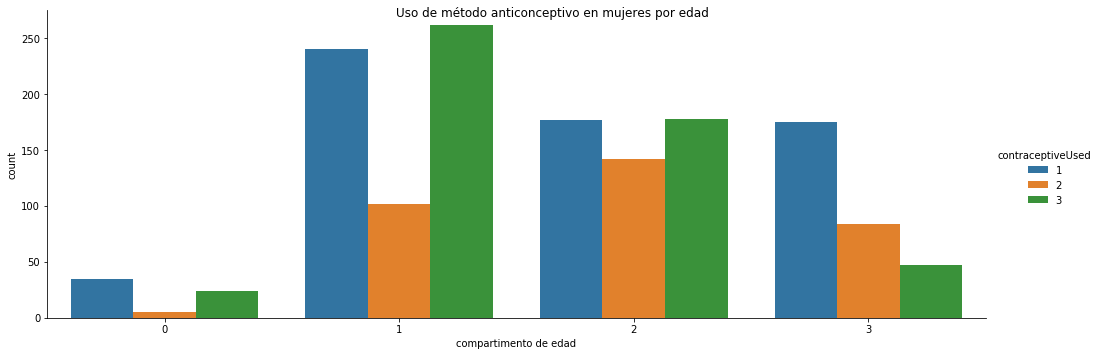

In [177]:
#Uso de metodo anticonceptivo en mujeres por edad
wifeAge_contraceptiveUsed = sns.catplot('wifeAge', data=rawData, hue='contraceptiveUsed', kind='count', aspect=2.75)
wifeAge_contraceptiveUsed.fig.suptitle('Uso de método anticonceptivo en mujeres por edad')
wifeAge_contraceptiveUsed.set_xlabels('compartimento de edad')
plt.savefig('wifeAge_contraceptiveUsed')
##En el compartimento de edad 1 el método anticonceptivo mas utilizado es el de corto plazo.
##En el compartimento de edad 2 el no uso de método anticonceptivo y el anticonceptivo de corto plazo son de uso igual.
##En el compartimento de edad 3 no utiliza ningun método anticonceptivo.